In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path='D:\\CDS503\\Assignment 1\\Depression'
os.chdir(path)

# Read csv data file
# Data without feature standardization
df_freq = pd.read_csv('Freq-PHO-Binary.csv')
df_norm = pd.read_csv('Norm-PHO-Binary.csv')

In [3]:
# Import LabelEncoder
from sklearn import preprocessing
# Create LabelEncoder
le = preprocessing.LabelEncoder()
# Convert string categories into numbers for gender and depression
df_freq['Gender'] = le.fit_transform(df_freq['Gender'])
df_freq['Depression'] = le.fit_transform(df_freq['Depression'])
df_norm['Gender'] = le.fit_transform(df_norm['Gender'])
df_norm['Depression'] = le.fit_transform(df_norm['Depression'])


In [4]:
df_freq.head()

,Gender,Emotion_Joy,Emotion_Sadness,Emotion_Anger,Emotion_Disgust,Emotion_Fear,Emotion_Surprise,Emotion_Contempt,Emotion_Neutral,Depression
0,0,4,3,2,1,0,2,2,1,0
1,0,8,0,2,0,1,0,0,4,0
2,1,5,0,0,0,14,2,0,15,0
3,1,7,0,3,0,0,5,0,0,0
4,1,3,2,1,0,2,1,0,6,1


In [5]:
df_norm.head()

,Gender,Emotion_Joy,Emotion_Sadness,Emotion_Anger,Emotion_Disgust,Emotion_Fear,Emotion_Surprise,Emotion_Contempt,Emotion_Neutral,Depression
0,0,4.00,3.0,2.0,1.0,0.00,2.00,2.0,1.0,0
1,0,8.00,0.0,2.0,0.0,1.00,0.00,0.0,4.0,0
2,1,1.67,0.0,0.0,0.0,6.17,0.67,0.0,6.5,0
3,1,7.00,0.0,3.0,0.0,0.00,5.00,0.0,0.0,0
4,1,3.00,2.0,1.0,0.0,2.00,1.00,0.0,6.0,1


In [6]:
df_freq.dtypes

Gender              int32
Emotion_Joy         int64
Emotion_Sadness     int64
Emotion_Anger       int64
Emotion_Disgust     int64
Emotion_Fear        int64
Emotion_Surprise    int64
Emotion_Contempt    int64
Emotion_Neutral     int64
Depression          int32
dtype: object

In [5]:
target_df_freq = df_freq['Depression']
target_df_norm = df_norm['Depression']

features_df_freq = df_freq.drop(['Depression'], axis=1)
features_df_norm = df_norm.drop(['Depression'], axis=1)

In [6]:
depression_count = target_df_freq.value_counts()
depression_count

0    186
1    160
Name: Depression, dtype: int64

In [7]:
depression_count = depression_count.rename(index={0:'No',1:'Yes'})
depression_count 

No     186
Yes    160
Name: Depression, dtype: int64

In [8]:
depression_count.index

Index(['No', 'Yes'], dtype='object')

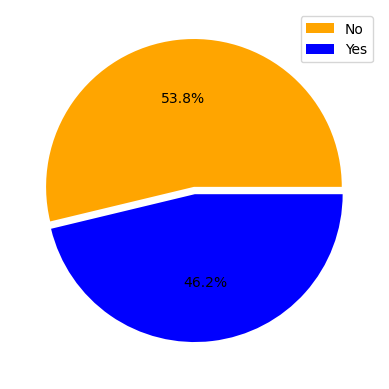

In [9]:
myexplode = [0.05, 0]
mycolors = ['orange','blue']
plt.pie(depression_count, explode = myexplode, colors = mycolors, autopct='%1.1f%%')
plt.legend(depression_count.index)
plt.show()

# 

# Train Test Split

In [10]:
from sklearn.model_selection import train_test_split

#### Run this for Freq

In [39]:
x_train, x_test, y_train, y_test = train_test_split(features_df_freq, target_df_freq, test_size = 0.2, random_state=0)

#### Run this for Norm

In [54]:
x_train, x_test, y_train, y_test = train_test_split(features_df_norm, target_df_norm, test_size = 0.2, random_state=0)

# 

## 3 Classifications + Dummy Classifier

# Dummy Classifier

In [16]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
dummy_classifier = DummyClassifier(strategy='uniform')
from sklearn import metrics

### Freq

In [37]:
scores = cross_val_score(dummy_classifier, x_train, y_train, cv = 10, scoring = 'accuracy')
print('Validation Accuracy Dummy: ', scores.mean())

dummy_classifier.fit(x_train, y_train)
test_predict = dummy_classifier.predict(x_test)

print("Test Accuracy Dummy (Freq): ", metrics.accuracy_score(y_test, test_predict))

Validation Accuracy Dummy:  0.5544973544973545
Test Accuracy Dummy (Freq):  0.4857142857142857


In [90]:
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
# Print confusion matrix
print(confusion_matrix(y_test, test_predict))

# Print precision, recall and F1
print("\t\t\tDummy Classifier w Freq Dataset\n", classification_report(y_test, test_predict))

[[20 17]
 [19 14]]
			Dummy Classifier w Freq Dataset
               precision    recall  f1-score   support

           0       0.51      0.54      0.53        37
           1       0.45      0.42      0.44        33

    accuracy                           0.49        70
   macro avg       0.48      0.48      0.48        70
weighted avg       0.48      0.49      0.48        70



# 

### Norm

In [34]:
scores = cross_val_score(dummy_classifier, x_train, y_train, cv = 10, scoring = 'accuracy')
print('Validation Accuracy Dummy: ', scores.mean())

dummy_classifier.fit(x_train, y_train)
test_predict = dummy_classifier.predict(x_test)

print("Test Accuracy Dummy (Norm): ", metrics.accuracy_score(y_test, test_predict))

Validation Accuracy Dummy:  0.4780423280423281
Test Accuracy Dummy (Norm):  0.5142857142857142


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
# Print confusion matrix
print(confusion_matrix(y_test, test_predict))

# Print precision, recall and F1
print("\t\t\tDummy Classifier w Norm Dataset\n", classification_report(y_test, test_predict))

[[17 20]
 [14 19]]
			Dummy Classifier w Norm Dataset
               precision    recall  f1-score   support

           0       0.55      0.46      0.50        37
           1       0.49      0.58      0.53        33

    accuracy                           0.51        70
   macro avg       0.52      0.52      0.51        70
weighted avg       0.52      0.51      0.51        70



# 

## K-Nearest Neighbours

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

### Freq 

In [49]:
for p_value in range(1,3):    
    for fold in [5,10]:
        highest = 0
        highest_k = 0
        print('p =', p_value)
        print('Fold: ', fold)
        for k in range(1,30):
            knn_classifier = KNeighborsClassifier(n_neighbors = k, p = p_value)
            scores = cross_val_score(knn_classifier, x_train, y_train, cv = fold, scoring = 'accuracy')
            
            knn_classifier.fit(x_train,y_train)
            test_predict = knn_classifier.predict(x_test)
            
            print('K-',k, 'Validation/Test Score average (Norm): ', scores.mean(), '/',  metrics.accuracy_score(y_test, test_predict))
            if(scores.mean() > highest):
                highest = scores.mean()
                highest_k = k
                
        print('Highest score mean: ', highest, ', Highest K-value: ', highest_k, '\n')

p = 1
Fold:  5
K- 1 Validation/Test Score average (Norm):  0.5179220779220779 / 0.5571428571428572
K- 2 Validation/Test Score average (Norm):  0.510909090909091 / 0.5714285714285714
K- 3 Validation/Test Score average (Norm):  0.5177272727272728 / 0.5428571428571428
K- 4 Validation/Test Score average (Norm):  0.517987012987013 / 0.5428571428571428
K- 5 Validation/Test Score average (Norm):  0.5251948051948052 / 0.5714285714285714
K- 6 Validation/Test Score average (Norm):  0.5397402597402597 / 0.5857142857142857
K- 7 Validation/Test Score average (Norm):  0.536103896103896 / 0.6
K- 8 Validation/Test Score average (Norm):  0.5287662337662338 / 0.6
K- 9 Validation/Test Score average (Norm):  0.5324025974025974 / 0.6142857142857143
K- 10 Validation/Test Score average (Norm):  0.5611038961038961 / 0.5571428571428572
K- 11 Validation/Test Score average (Norm):  0.5466883116883118 / 0.6142857142857143
K- 12 Validation/Test Score average (Norm):  0.5433116883116883 / 0.5571428571428572
K- 13 V

K- 13 Validation/Test Score average (Norm):  0.4810846560846561 / 0.5571428571428572
K- 14 Validation/Test Score average (Norm):  0.5215608465608466 / 0.5428571428571428
K- 15 Validation/Test Score average (Norm):  0.5027777777777778 / 0.6428571428571429
K- 16 Validation/Test Score average (Norm):  0.5183862433862434 / 0.6142857142857143
K- 17 Validation/Test Score average (Norm):  0.5066137566137565 / 0.6285714285714286
K- 18 Validation/Test Score average (Norm):  0.5328042328042327 / 0.6142857142857143
K- 19 Validation/Test Score average (Norm):  0.5181216931216931 / 0.6285714285714286
K- 20 Validation/Test Score average (Norm):  0.5575396825396826 / 0.6571428571428571
K- 21 Validation/Test Score average (Norm):  0.5576719576719577 / 0.6714285714285714
K- 22 Validation/Test Score average (Norm):  0.543121693121693 / 0.6571428571428571
K- 23 Validation/Test Score average (Norm):  0.5796296296296297 / 0.6142857142857143
K- 24 Validation/Test Score average (Norm):  0.5505291005291004 / 

In [50]:
knn_classifier = KNeighborsClassifier(n_neighbors = 29, p = 2)
scores = cross_val_score(knn_classifier, x_train, y_train, cv = 5, scoring = 'accuracy')
print("Validation Accuracy KNN: ", scores.mean())

knn_classifier.fit(x_train,y_train)
test_predict = knn_classifier.predict(x_test)
print("Test Accuracy KNN (Freq): ", metrics.accuracy_score(y_test, test_predict))

Validation Accuracy KNN:  0.5907142857142856
Test Accuracy KNN (Freq):  0.6428571428571429


In [104]:
# Print confusion matrix
print(confusion_matrix(y_test, test_predict))

# Print precision, recall and F1
print("\t\t\tKNN w Freq Dataset\n", classification_report(y_test, test_predict))

[[27 10]
 [15 18]]
			KNN w Freq Dataset
               precision    recall  f1-score   support

           0       0.64      0.73      0.68        37
           1       0.64      0.55      0.59        33

    accuracy                           0.64        70
   macro avg       0.64      0.64      0.64        70
weighted avg       0.64      0.64      0.64        70



In [ ]:
#1-5% difference is reasonable

#

### Norm 

In [131]:
for p_value in range(1,3):
    
    for fold in [5,10]:
        highest = 0
        highest_k = 0
        print('p =', p_value)
        print('Fold: ', fold)
        for k in range(1,30):
            knn_classifier = KNeighborsClassifier(n_neighbors = k, p = p_value)
            scores = cross_val_score(knn_classifier, x_train, y_train, cv = fold, scoring = 'accuracy')
            
            knn_classifier.fit(x_train,y_train)
            test_predict = knn_classifier.predict(x_test)
            
            print('K-',k, 'Validation/Test Score average (Norm): ', scores.mean(), '/',  metrics.accuracy_score(y_test, test_predict))
            if(scores.mean() > highest):
                highest = scores.mean()
                highest_k = k
            print()
        print('Highest score mean: ', highest, ', Highest K-value: ', highest_k, '\n')

p = 1
Fold:  5
K- 1 Validation/Test Score average (Norm):  0.5904545454545455 / 0.6

K- 2 Validation/Test Score average (Norm):  0.5505194805194804 / 0.5571428571428572

K- 3 Validation/Test Score average (Norm):  0.546948051948052 / 0.5857142857142857

K- 4 Validation/Test Score average (Norm):  0.5324025974025973 / 0.5714285714285714

K- 5 Validation/Test Score average (Norm):  0.5143506493506493 / 0.5571428571428572

K- 6 Validation/Test Score average (Norm):  0.5216883116883116 / 0.5714285714285714

K- 7 Validation/Test Score average (Norm):  0.5324025974025974 / 0.5857142857142857

K- 8 Validation/Test Score average (Norm):  0.5468181818181819 / 0.6

K- 9 Validation/Test Score average (Norm):  0.5433116883116883 / 0.5571428571428572

K- 10 Validation/Test Score average (Norm):  0.5614285714285714 / 0.5571428571428572

K- 11 Validation/Test Score average (Norm):  0.5431818181818182 / 0.6

K- 12 Validation/Test Score average (Norm):  0.5468831168831169 / 0.5428571428571428

K- 13 Va

K- 11 Validation/Test Score average (Norm):  0.5502645502645501 / 0.5285714285714286

K- 12 Validation/Test Score average (Norm):  0.5247354497354497 / 0.5714285714285714

K- 13 Validation/Test Score average (Norm):  0.538888888888889 / 0.6

K- 14 Validation/Test Score average (Norm):  0.5173280423280424 / 0.5428571428571428

K- 15 Validation/Test Score average (Norm):  0.5281746031746033 / 0.5285714285714286

K- 16 Validation/Test Score average (Norm):  0.5429894179894179 / 0.5428571428571428

K- 17 Validation/Test Score average (Norm):  0.5394179894179894 / 0.6

K- 18 Validation/Test Score average (Norm):  0.5359788359788359 / 0.5571428571428572

K- 19 Validation/Test Score average (Norm):  0.5395502645502646 / 0.6142857142857143

K- 20 Validation/Test Score average (Norm):  0.5617724867724868 / 0.6142857142857143

K- 21 Validation/Test Score average (Norm):  0.5547619047619048 / 0.6285714285714286

K- 22 Validation/Test Score average (Norm):  0.5441798941798942 / 0.6142857142857143


In [47]:
knn_classifier = KNeighborsClassifier(n_neighbors = 27, p = 2)
scores = cross_val_score(knn_classifier, x_train, y_train, cv = 5, scoring = 'accuracy')
print("Validation Accuracy KNN: ", scores.mean())

knn_classifier.fit(x_train,y_train)
test_predict = knn_classifier.predict(x_test)
print("Test Accuracy KNN (Norm): ", metrics.accuracy_score(y_test, test_predict))

Validation Accuracy KNN:  0.5616233766233766
Test Accuracy KNN (Norm):  0.6428571428571429


In [48]:
# Print confusion matrix
print(confusion_matrix(y_test, test_predict))

# Print precision, recall and F1
print("\t\t\tKNN w Freq Dataset\n", classification_report(y_test, test_predict))

[[27 10]
 [15 18]]
			KNN w Freq Dataset
               precision    recall  f1-score   support

           0       0.64      0.73      0.68        37
           1       0.64      0.55      0.59        33

    accuracy                           0.64        70
   macro avg       0.64      0.64      0.64        70
weighted avg       0.64      0.64      0.64        70



# 

# SVM

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

### Freq

In [42]:
param_grid = {'C': [1.0,10.0,100.0,1000.0]}
for SVM_mode in ['linear', 'poly', 'rbf', 'sigmoid']:
    for fold in [5,10]:
        grid_search = GridSearchCV(SVC(kernel= SVM_mode), param_grid, cv= fold)
        grid_result = grid_search.fit(x_train, y_train)
        C_best = grid_result.best_params_.get('C') #{'C' : '1'}
        print('Kernel=', SVM_mode)
        print('Fold= ', fold)
        
        if(SVM_mode == 'linear'):
            svm = SVC(kernel= SVM_mode, C= C_best)
        else:
            svm = SVC(kernel= SVM_mode, C= C_best, gamma= 'scale')
        
        scores = cross_val_score(svm, x_train, y_train, cv= fold, scoring = 'accuracy')
        print('C= ',C_best, '\nValidation score for SVM', SVM_mode, ': ', scores.mean())
        
        svm.fit(x_train,y_train)
        test_predict = svm.predict(x_test)
        print("Testing score for SVM RBF (Freq): ", metrics.accuracy_score(y_test, test_predict),'\n')

Kernel= linear
Fold=  5
C=  1.0 
Validation score for SVM linear :  0.5795454545454545
Testing score for SVM RBF (Freq):  0.6285714285714286 

Kernel= linear
Fold=  10
C=  1.0 
Validation score for SVM linear :  0.5698412698412698
Testing score for SVM RBF (Freq):  0.6285714285714286 

Kernel= poly
Fold=  5
C=  100.0 
Validation score for SVM poly :  0.5763636363636364
Testing score for SVM RBF (Freq):  0.5714285714285714 

Kernel= poly
Fold=  10
C=  1.0 
Validation score for SVM poly :  0.5834656084656084
Testing score for SVM RBF (Freq):  0.5142857142857142 

Kernel= rbf
Fold=  5
C=  1.0 
Validation score for SVM rbf :  0.5759090909090909
Testing score for SVM RBF (Freq):  0.6428571428571429 

Kernel= rbf
Fold=  10
C=  1.0 
Validation score for SVM rbf :  0.5838624338624337
Testing score for SVM RBF (Freq):  0.6428571428571429 

Kernel= sigmoid
Fold=  5
C=  10.0 
Validation score for SVM sigmoid :  0.5577272727272726
Testing score for SVM RBF (Freq):  0.5714285714285714 

Kernel= sig

In [52]:
SVM_mode = 'rbf'
C_value = 1

svm = SVC(kernel= SVM_mode, C= C_value)
scores = cross_val_score(svm, x_train, y_train, cv= 10, scoring = 'accuracy')
print('Validation score for SVM RBF (Freq): ', scores.mean())

svm.fit(x_train,y_train)
test_predict = svm.predict(x_test)
print("Testing score for SVM RBF (Freq): ", metrics.accuracy_score(y_test, test_predict))

Validation score for SVM RBF (Freq):  0.5838624338624337
Testing score for SVM RBF (Freq):  0.6428571428571429


In [108]:
# Import scikit-learn metrics methods
from sklearn.metrics import classification_report, confusion_matrix
# Print confusion matrix
print(confusion_matrix(y_test, test_predict))
# Print precision, recall and F1
print(classification_report(y_test, test_predict))

[[32  5]
 [20 13]]
              precision    recall  f1-score   support

           0       0.62      0.86      0.72        37
           1       0.72      0.39      0.51        33

    accuracy                           0.64        70
   macro avg       0.67      0.63      0.61        70
weighted avg       0.67      0.64      0.62        70



### Norm

In [143]:
param_grid = {'C': [1.0,10.0,100.0,1000.0]}
for SVM_mode in ['linear', 'poly', 'rbf', 'sigmoid']:
    for fold in [5,10]:
        grid_search = GridSearchCV(SVC(kernel= SVM_mode), param_grid, cv= fold)
        grid_result = grid_search.fit(x_train, y_train)
        C_best = grid_result.best_params_.get('C') #{'C' : '1'}
        print('Kernel=', SVM_mode)
        print('Fold= ', fold)
        
        if(SVM_mode == 'linear'):
            svm = SVC(kernel= SVM_mode, C= C_best)
        else:
            svm = SVC(kernel= SVM_mode, C= C_best, gamma= 'scale')
        
        scores = cross_val_score(svm, x_train, y_train, cv= fold, scoring = 'accuracy')
        print('C= ',C_best, '\nValidation score for SVM', SVM_mode, ': ', scores.mean())                
        svm.fit(x_train,y_train)
        test_predict = svm.predict(x_test)
        print("Testing score for SVM RBF (Norm): ", metrics.accuracy_score(y_test, test_predict),'\n')

Kernel= linear
Fold=  5
C=  1.0 
Validation score for SVM linear :  0.5577922077922077
Testing score for SVM RBF (Norm):  0.6714285714285714 

Kernel= linear
Fold=  10
C=  1.0 
Validation score for SVM linear :  0.5443121693121693
Testing score for SVM RBF (Norm):  0.6714285714285714 

Kernel= poly
Fold=  5
C=  1.0 
Validation score for SVM poly :  0.615844155844156
Testing score for SVM RBF (Norm):  0.6857142857142857 

Kernel= poly
Fold=  10
C=  1.0 
Validation score for SVM poly :  0.6236772486772486
Testing score for SVM RBF (Norm):  0.6857142857142857 

Kernel= rbf
Fold=  5
C=  1.0 
Validation score for SVM rbf :  0.5976623376623376
Testing score for SVM RBF (Norm):  0.6571428571428571 

Kernel= rbf
Fold=  10
C=  10.0 
Validation score for SVM rbf :  0.6091269841269841
Testing score for SVM RBF (Norm):  0.6142857142857143 

Kernel= sigmoid
Fold=  5
C=  1.0 
Validation score for SVM sigmoid :  0.507077922077922
Testing score for SVM RBF (Norm):  0.5142857142857142 

Kernel= sigmoid

In [55]:
SVM_mode = 'poly'
C_value = 1

svm = SVC(kernel= SVM_mode, C= C_value)
scores = cross_val_score(svm, x_train, y_train, cv= 10, scoring = 'accuracy')
print('Validation score for SVM', SVM_mode, ':', scores.mean())

svm.fit(x_train,y_train)
test_predict = svm.predict(x_test)
print('Testing score for SVM', SVM_mode, '(Norm):', metrics.accuracy_score(y_test, test_predict))


Validation score for SVM poly : 0.6236772486772486
Testing score for SVM poly (Norm): 0.6857142857142857


In [56]:
# Import scikit-learn metrics methods
from sklearn.metrics import classification_report, confusion_matrix
# Print confusion matrix
print(confusion_matrix(y_test, test_predict))
# Print precision, recall and F1
print(classification_report(y_test, test_predict))

[[26 11]
 [11 22]]
              precision    recall  f1-score   support

           0       0.70      0.70      0.70        37
           1       0.67      0.67      0.67        33

    accuracy                           0.69        70
   macro avg       0.68      0.68      0.68        70
weighted avg       0.69      0.69      0.69        70



# 

# Naive Bayes

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

### Freq

In [114]:
print('Freq Naive Bayes\n')

for NB in [GaussianNB(), BernoulliNB(), MultinomialNB()]:
    for fold in [5,10]:
        print('At fold',fold, ', using', NB)
        scores= cross_val_score(NB, x_train, y_train, cv= fold, scoring= 'accuracy')
        print('\tValidation accuracy score (Freq):',scores.mean())
        
        NB.fit(x_train,y_train)
        test_predict= NB.predict(x_test)
        print('\tTesting score (Freq):', metrics.accuracy_score(y_test, test_predict))
    
    print('\n')

Freq Naive Bayes

At fold 5 , using GaussianNB()
	Validation accuracy score (Freq): 0.5688961038961039
	Testing score (Freq): 0.5857142857142857
At fold 10 , using GaussianNB()
	Validation accuracy score (Freq): 0.5838624338624339
	Testing score (Freq): 0.5857142857142857


At fold 5 , using BernoulliNB()
	Validation accuracy score (Freq): 0.5544805194805195
	Testing score (Freq): 0.6571428571428571
At fold 10 , using BernoulliNB()
	Validation accuracy score (Freq): 0.5474867724867725
	Testing score (Freq): 0.6571428571428571


At fold 5 , using MultinomialNB()
	Validation accuracy score (Freq): 0.5761688311688311
	Testing score (Freq): 0.6857142857142857
At fold 10 , using MultinomialNB()
	Validation accuracy score (Freq): 0.5693121693121693
	Testing score (Freq): 0.6857142857142857




In [119]:
NB = GaussianNB()
scores = cross_val_score(NB, x_train, y_train, cv= 10, scoring = 'accuracy')
print('Validation score for', NB, ':', scores.mean())

NB.fit(x_train,y_train)
test_predict= NB.predict(x_test)
print('Testing score (Freq):', metrics.accuracy_score(y_test, test_predict))

Validation score for GaussianNB() : 0.5838624338624339
Testing score (Freq): 0.5857142857142857


In [120]:
# Import scikit-learn metrics methods
from sklearn.metrics import classification_report, confusion_matrix
# Print confusion matrix
print(confusion_matrix(y_test, test_predict))
# Print precision, recall and F1
print(classification_report(y_test, test_predict))

[[30  7]
 [22 11]]
              precision    recall  f1-score   support

           0       0.58      0.81      0.67        37
           1       0.61      0.33      0.43        33

    accuracy                           0.59        70
   macro avg       0.59      0.57      0.55        70
weighted avg       0.59      0.59      0.56        70



### Norm

In [144]:
print('Norm Naive Bayes\n')

for NB in [GaussianNB(), BernoulliNB(), MultinomialNB()]:
    for fold in [5,10]:
        print('At fold',fold, ', using', NB)
        scores= cross_val_score(NB, x_train, y_train, cv= fold, scoring= 'accuracy')
        print('\tValidation accuracy score (Norm):',scores.mean())
        
        NB.fit(x_train,y_train)
        test_predict= NB.predict(x_test)
        print('\tTesting score (Norm):', metrics.accuracy_score(y_test, test_predict))
    
    print('\n')

Norm Naive Bayes

At fold 5 , using GaussianNB()
	Validation accuracy score (Norm): 0.5653246753246753
	Testing score (Norm): 0.6714285714285714
At fold 10 , using GaussianNB()
	Validation accuracy score (Norm): 0.5763227513227513
	Testing score (Norm): 0.6714285714285714


At fold 5 , using BernoulliNB()
	Validation accuracy score (Norm): 0.5580519480519481
	Testing score (Norm): 0.6571428571428571
At fold 10 , using BernoulliNB()
	Validation accuracy score (Norm): 0.543915343915344
	Testing score (Norm): 0.6571428571428571


At fold 5 , using MultinomialNB()
	Validation accuracy score (Norm): 0.5978571428571429
	Testing score (Norm): 0.6285714285714286
At fold 10 , using MultinomialNB()
	Validation accuracy score (Norm): 0.6022486772486773
	Testing score (Norm): 0.6285714285714286




In [145]:
NB = MultinomialNB()
scores = cross_val_score(NB, x_train, y_train, cv= 10, scoring = 'accuracy')
print('Validation score for', NB, ':', scores.mean())

NB.fit(x_train,y_train)
test_predict= NB.predict(x_test)
print('Testing score (Freq):', metrics.accuracy_score(y_test, test_predict))

Validation score for MultinomialNB() : 0.6022486772486773
Testing score (Freq): 0.6285714285714286


In [146]:
# Import scikit-learn metrics methods
from sklearn.metrics import classification_report, confusion_matrix
# Print confusion matrix
print(confusion_matrix(y_test, test_predict))
# Print precision, recall and F1
print(classification_report(y_test, test_predict))

[[26 11]
 [15 18]]
              precision    recall  f1-score   support

           0       0.63      0.70      0.67        37
           1       0.62      0.55      0.58        33

    accuracy                           0.63        70
   macro avg       0.63      0.62      0.62        70
weighted avg       0.63      0.63      0.63        70



# 

# Decision Trees

In [14]:
from sklearn.tree import DecisionTreeClassifier

### Freq

In [123]:
for dtree_criterion in ["gini", "entropy"]:
    for dtree_max_depth in range(1,6):
        for fold in [5, 10]:
            dtree = DecisionTreeClassifier(criterion = dtree_criterion, max_depth = dtree_max_depth)
            print('At fold',fold, ', using criterion', dtree_criterion, 'at max_depth', dtree_max_depth)
            scores= cross_val_score(dtree, x_train, y_train, cv= fold, scoring= 'accuracy')
            
            dtree.fit(x_train, y_train)
            test_predict = dtree.predict(x_test)
            dtree = DecisionTreeClassifier(criterion = dtree_criterion, max_depth = dtree_max_depth)
            print('\tValidation/Testing score (Freq):', scores.mean(),'/', metrics.accuracy_score(y_test, test_predict), '\n')

At fold 5 , using criterion gini at max_depth 1
	Validation/Testing score (Freq): 0.5470129870129871 / 0.5571428571428572 

At fold 10 , using criterion gini at max_depth 1
	Validation/Testing score (Freq): 0.5398148148148149 / 0.5571428571428572 

At fold 5 , using criterion gini at max_depth 2
	Validation/Testing score (Freq): 0.5471428571428572 / 0.5714285714285714 

At fold 10 , using criterion gini at max_depth 2
	Validation/Testing score (Freq): 0.5757936507936509 / 0.5714285714285714 

At fold 5 , using criterion gini at max_depth 3
	Validation/Testing score (Freq): 0.5616233766233766 / 0.5714285714285714 

At fold 10 , using criterion gini at max_depth 3
	Validation/Testing score (Freq): 0.5657407407407408 / 0.5714285714285714 

At fold 5 , using criterion gini at max_depth 4
	Validation/Testing score (Freq): 0.576038961038961 / 0.5142857142857142 

At fold 10 , using criterion gini at max_depth 4
	Validation/Testing score (Freq): 0.5469576719576719 / 0.5142857142857142 

At fo

In [126]:
dtree_criterion = 'gini'
dtree_max_depth = 2

dtree = DecisionTreeClassifier(criterion = dtree_criterion, max_depth = dtree_max_depth)


scores= cross_val_score(dtree, x_train, y_train, cv= fold, scoring= 'accuracy')
print('Validation accuracy score (Freq):',scores.mean())

dtree.fit(x_train, y_train)
test_predict = dtree.predict(x_test)
print('Testing score (Freq):', metrics.accuracy_score(y_test, test_predict), '\n')

Validation accuracy score (Freq): 0.5757936507936509
Testing score (Freq): 0.5714285714285714 



In [127]:
# Import scikit-learn metrics methods
from sklearn.metrics import classification_report, confusion_matrix
# Print confusion matrix
print(confusion_matrix(y_test, test_predict))
# Print precision, recall and F1
print(classification_report(y_test, test_predict))

[[30  7]
 [23 10]]
              precision    recall  f1-score   support

           0       0.57      0.81      0.67        37
           1       0.59      0.30      0.40        33

    accuracy                           0.57        70
   macro avg       0.58      0.56      0.53        70
weighted avg       0.58      0.57      0.54        70



### Norm

In [20]:
for dtree_criterion in ["gini", "entropy"]:
    for dtree_max_depth in range(1,6):
        for fold in [5, 10]:
            dtree = DecisionTreeClassifier(criterion = dtree_criterion, max_depth = dtree_max_depth)
            print('At fold',fold, ', using criterion', dtree_criterion, 'at max_depth', dtree_max_depth)
            scores= cross_val_score(dtree, x_train, y_train, cv= fold, scoring= 'accuracy')
            print('\tValidation accuracy score (Norm):',scores.mean())
            
            dtree.fit(x_train, y_train)
            test_predict = dtree.predict(x_test)
            print('\tTesting score (Norm):', metrics.accuracy_score(y_test, test_predict), '\n')

At fold 5 , using criterion gini at max_depth 1
	Validation accuracy score (Norm): 0.5253246753246753
	Testing score (Norm): 0.5571428571428572 

At fold 10 , using criterion gini at max_depth 1
	Validation accuracy score (Norm): 0.5326719576719576
	Testing score (Norm): 0.5571428571428572 

At fold 5 , using criterion gini at max_depth 2
	Validation accuracy score (Norm): 0.5722077922077922
	Testing score (Norm): 0.6 

At fold 10 , using criterion gini at max_depth 2
	Validation accuracy score (Norm): 0.5834656084656085
	Testing score (Norm): 0.6 

At fold 5 , using criterion gini at max_depth 3
	Validation accuracy score (Norm): 0.5540259740259741
	Testing score (Norm): 0.6142857142857143 

At fold 10 , using criterion gini at max_depth 3
	Validation accuracy score (Norm): 0.5543650793650794
	Testing score (Norm): 0.6142857142857143 

At fold 5 , using criterion gini at max_depth 4
	Validation accuracy score (Norm): 0.5431818181818182
	Testing score (Norm): 0.5428571428571428 

At fo

In [21]:
dtree_criterion = 'gini'
dtree_max_depth = 3
fold = 10

dtree = DecisionTreeClassifier(criterion = dtree_criterion, max_depth = dtree_max_depth)


scores= cross_val_score(dtree, x_train, y_train, cv= fold, scoring= 'accuracy')
print('Validation accuracy score (Freq):',scores.mean())

dtree.fit(x_train, y_train)
test_predict = dtree.predict(x_test)
print('Testing score (Freq):', metrics.accuracy_score(y_test, test_predict), '\n')

Validation accuracy score (Freq): 0.5543650793650794
Testing score (Freq): 0.6142857142857143 



In [22]:
# Import scikit-learn metrics methods
from sklearn.metrics import classification_report, confusion_matrix
# Print confusion matrix
print(confusion_matrix(y_test, test_predict))
# Print precision, recall and F1
print(classification_report(y_test, test_predict))

[[25 12]
 [15 18]]
              precision    recall  f1-score   support

           0       0.62      0.68      0.65        37
           1       0.60      0.55      0.57        33

    accuracy                           0.61        70
   macro avg       0.61      0.61      0.61        70
weighted avg       0.61      0.61      0.61        70



# 

# Pickle to export model

In [57]:
# Import pickle
import pickle
# Specify the file name to save the model
# Use filename='freq_model.sav' for Freq-PHO-Binary
# Use filename='norm_model.sav' for Norm-PHO-Binary
filename='norm_model.sav'
# Open the file name in write mode. Pass the filename and model.
# Replace modelname with the name of your model
pickle.dump(svm, open(filename, 'wb'))